In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import os
from pathlib import Path

#### Importing and Combining Data

In [431]:
path = r'C:\Users\ierem\Downloads\airbnb\weekdays'  # or unix / linux / mac path

city_names = ['amsterdam','athens','barcelona','berlin','budapest','lisbon','london','paris','rome','vienna']

# Get the files from the path provided in the OP
files = Path(path).glob('*.csv')  # .rglob to get subdirectories

dfs = list()
for i, f in enumerate(files):
    data = pd.read_csv(f)
    data['file'] = f'File {i}'
    dfs.append(data)

df = pd.concat(dfs, ignore_index=True)
df

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0               0  194.033698     Private room        False          True   
1               1  344.245776     Private room        False          True   
2               2  264.101422     Private room        False          True   
3               3  433.529398     Private room        False          True   
4               4  485.552926     Private room        False          True   
...           ...         ...              ...          ...           ...   
25495        1733  219.012224  Entire home/apt        False         False   
25496        1734  191.197438  Entire home/apt        False         False   
25497        1735  251.501765  Entire home/apt        False         False   
25498        1736  637.636444  Entire home/apt        False         False   
25499        1737  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
25495              4.0              False      0    0                 8.0   
25496              4.0              False      0    1                10.0   
25497              2.0              False      0    0                 8.0   
25498              2.0              False      0    0                10.0   
25499              4.0               True      1    0                10.0   

       ...  bedrooms      dist  metro_dist  attr_index  attr_index_norm  \
0      ...         1  5.022964    2.539380   78.690379         4.166708   
1      ...         1  0.488389    0.239404  631.176378        33.421209   
2      ...         1  5.748312    3.651621   75.275877         3.985908   
3      ...         2  0.384862    0.439876  493.272534        26.119108   
4      ...         1  0.544738    0.318693  552.830324        29.272733   
...    ...       ...       ...         ...         ...              ...   
25495  ...         0  0.298179    0.257904  851.189543        60.958556   
25496  ...         2  1.052982    0.332054  195.654600        14.011946   
25497  ...         1  0.810224    0.100844  204.967222        14.678876   
25498  ...         1  0.994039    0.202537  169.074867        12.108419   
25499  ...         1  1.263948    0.480922  150.449976        10.774584   

       rest_index  rest_index_norm       lng       lat    file  
0       98.253896         6.846473   4.90569  52.41772  File 0  
1      837.280757        58.342928   4.90005  52.37432  File 0  
2       95.386955         6.646700   4.97512  52.36103  File 0  
3      875.033098        60.973565   4.89417  52.37663  File 0  
4      815.305740        56.811677   4.90051  52.37508  File 0  
...           ...              ...       ...       ...     ...  
25495  593.167136        14.180090  16.37766  48.20875  File 9  
25496  305.781569         7.309930  16.37892  48.19973  File 9  
25497  342.177253         8.179995  16.38070  48.20296  File 9  
25498  282.299117         6.748565  16.38568  48.20460  File 9  
25499  225.245048         5.384646  16.39066  48.20811  File 9  

[25500 rows x 21 columns]

#### Inserting city names as they don't exist in the table

In [432]:
city_names = ['amsterdam','athens','barcelona','berlin','budapest','lisbon','london','paris','rome','vienna']
city_inds = [city.capitalize() for city in city_names]
city_inds

dfs1 = list()
dfs2 = list()
for city in city_names:
    file1 = r'C:\Users\ierem\Downloads\airbnb\weekdays\\'+city+'_weekdays.csv'
    file2 = r'C:\Users\ierem\Downloads\airbnb\weekend\\'+city+'_weekends.csv'

    data1 = pd.read_csv(file1)
    data2 = pd.read_csv(file2)
    data1["City"] = city
    data2["City"] = city
    data1["Day"] = "weekday"
    data2["Day"] = "weekend"
    dfs1.append(data1)
    dfs2.append(data2)


df1 = pd.concat(dfs1, ignore_index=True)
df2 = pd.concat(dfs2, ignore_index=True)

df = df1.append(df2, ignore_index=True)
first_column = df.pop('City')
df.insert(0, 'City', first_column)
df.City = df.City.str.capitalize()
df

C:\Users\ierem\AppData\Local\Temp\ipykernel_182584\1906393375.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



City  Unnamed: 0     realSum        room_type  room_shared  \
0      Amsterdam           0  194.033698     Private room        False   
1      Amsterdam           1  344.245776     Private room        False   
2      Amsterdam           2  264.101422     Private room        False   
3      Amsterdam           3  433.529398     Private room        False   
4      Amsterdam           4  485.552926     Private room        False   
...          ...         ...         ...              ...          ...   
51702     Vienna        1794  715.938574  Entire home/apt        False   
51703     Vienna        1795  304.793960  Entire home/apt        False   
51704     Vienna        1796  637.168969  Entire home/apt        False   
51705     Vienna        1797  301.054157     Private room        False   
51706     Vienna        1798  133.230489     Private room        False   

       room_private  person_capacity  host_is_superhost  multi  biz  ...  \
0              True              2.0              False      1    0  ...   
1              True              4.0              False      0    0  ...   
2              True              2.0              False      0    1  ...   
3              True              4.0              False      0    1  ...   
4              True              2.0               True      0    0  ...   
...             ...              ...                ...    ...  ...  ...   
51702         False              6.0              False      0    1  ...   
51703         False              2.0              False      0    0  ...   
51704         False              2.0              False      0    0  ...   
51705          True              2.0              False      0    0  ...   
51706          True              4.0               True      1    0  ...   

       bedrooms      dist  metro_dist  attr_index  attr_index_norm  \
0             1  5.022964    2.539380   78.690379         4.166708   
1             1  0.488389    0.239404  631.176378        33.421209   
2             1  5.748312    3.651621   75.275877         3.985908   
3             2  0.384862    0.439876  493.272534        26.119108   
4             1  0.544738    0.318693  552.830324        29.272733   
...         ...       ...         ...         ...              ...   
51702         3  0.530181    0.135447  219.402478        15.712158   
51703         1  0.810205    0.100839  204.970121        14.678608   
51704         1  0.994051    0.202539  169.073402        12.107921   
51705         1  3.044100    0.287435  109.236574         7.822803   
51706         1  1.263932    0.480903  150.450381        10.774264   

       rest_index  rest_index_norm       lng       lat      Day  
0       98.253896         6.846473   4.90569  52.41772  weekday  
1      837.280757        58.342928   4.90005  52.37432  weekday  
2       95.386955         6.646700   4.97512  52.36103  weekday  
3      875.033098        60.973565   4.89417  52.37663  weekday  
4      815.305740        56.811677   4.90051  52.37508  weekday  
...           ...              ...       ...       ...      ...  
51702  438.756874        10.604584  16.37940  48.21136  weekend  
51703  342.182813         8.270427  16.38070  48.20296  weekend  
51704  282.296424         6.822996  16.38568  48.20460  weekend  
51705  158.563398         3.832416  16.34100  48.19200  weekend  
51706  225.247293         5.444140  16.39066  48.20811  weekend  

[51707 rows x 22 columns]

### Cleaning and Organising Data

In [433]:
df.drop(columns =["Unnamed: 0"], inplace=True) 

In [451]:
df.columns

Index(['City', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'Day'],
      dtype='object')

In [457]:
df[['person_capacity']] = df[['person_capacity']].astype(int)

In [458]:
df.isna().sum()

City                          0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
Day                           0
dtype: int64

In [459]:
df.duplicated().sum()

0

In [460]:
df_backup = df
df

City     realSum        room_type  room_shared  room_private  \
0      Amsterdam  194.033698     Private room        False          True   
1      Amsterdam  344.245776     Private room        False          True   
2      Amsterdam  264.101422     Private room        False          True   
3      Amsterdam  433.529398     Private room        False          True   
4      Amsterdam  485.552926     Private room        False          True   
...          ...         ...              ...          ...           ...   
51702     Vienna  715.938574  Entire home/apt        False         False   
51703     Vienna  304.793960  Entire home/apt        False         False   
51704     Vienna  637.168969  Entire home/apt        False         False   
51705     Vienna  301.054157     Private room        False          True   
51706     Vienna  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                    2              False      1    0                10.0   
1                    4              False      0    0                 8.0   
2                    2              False      0    1                 9.0   
3                    4              False      0    1                 9.0   
4                    2               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
51702                6              False      0    1                10.0   
51703                2              False      0    0                 8.0   
51704                2              False      0    0                10.0   
51705                2              False      0    0                10.0   
51706                4               True      1    0                10.0   

       ...  bedrooms      dist  metro_dist  attr_index  attr_index_norm  \
0      ...         1  5.022964    2.539380   78.690379         4.166708   
1      ...         1  0.488389    0.239404  631.176378        33.421209   
2      ...         1  5.748312    3.651621   75.275877         3.985908   
3      ...         2  0.384862    0.439876  493.272534        26.119108   
4      ...         1  0.544738    0.318693  552.830324        29.272733   
...    ...       ...       ...         ...         ...              ...   
51702  ...         3  0.530181    0.135447  219.402478        15.712158   
51703  ...         1  0.810205    0.100839  204.970121        14.678608   
51704  ...         1  0.994051    0.202539  169.073402        12.107921   
51705  ...         1  3.044100    0.287435  109.236574         7.822803   
51706  ...         1  1.263932    0.480903  150.450381        10.774264   

       rest_index  rest_index_norm       lng       lat      Day  
0       98.253896         6.846473   4.90569  52.41772  weekday  
1      837.280757        58.342928   4.90005  52.37432  weekday  
2       95.386955         6.646700   4.97512  52.36103  weekday  
3      875.033098        60.973565   4.89417  52.37663  weekday  
4      815.305740        56.811677   4.90051  52.37508  weekday  
...           ...              ...       ...       ...      ...  
51702  438.756874        10.604584  16.37940  48.21136  weekend  
51703  342.182813         8.270427  16.38070  48.20296  weekend  
51704  282.296424         6.822996  16.38568  48.20460  weekend  
51705  158.563398         3.832416  16.34100  48.19200  weekend  
51706  225.247293         5.444140  16.39066  48.20811  weekend  

[51707 rows x 21 columns]

#### Creating a dataframe for finding out average prices of room types in the cities 

In [437]:
df_tempd =  df.query("Day=='weekday'").groupby(["City","room_type"]) \
       .agg({'realSum':'mean'}) \
       .reset_index() \
       .rename(columns={'realSum': 'Average Price'}).sort_values("City",ascending = True)

df_tempd

City        room_type  Average Price
0   Amsterdam  Entire home/apt     733.179099
1   Amsterdam     Private room     366.764655
2   Amsterdam      Shared room     280.973918
3      Athens  Entire home/apt     159.446251
4      Athens     Private room     114.265921
5      Athens      Shared room      76.535514
6   Barcelona  Entire home/apt     572.560054
7   Barcelona     Private room     202.754366
8   Barcelona      Shared room     114.797403
9      Berlin  Entire home/apt     351.994960
10     Berlin     Private room     176.219742
11     Berlin      Shared room     143.631726
13   Budapest     Private room     102.372106
14   Budapest      Shared room     124.514063
12   Budapest  Entire home/apt     176.303908
15     Lisbon  Entire home/apt     280.079582
16     Lisbon     Private room     147.264072
17     Lisbon      Shared room     102.613240
18     London  Entire home/apt     551.540156
19     London     Private room     218.515017
20     London      Shared room     181.432955
21      Paris  Entire home/apt     435.591909
22      Paris     Private room     301.953303
23      Paris      Shared room     139.798082
24       Rome  Entire home/apt     237.431408
25       Rome     Private room     145.091043
26       Rome      Shared room      89.943255
28     Vienna     Private room     191.653288
27     Vienna  Entire home/apt     254.550404
29     Vienna      Shared room     169.827134

### Finding out average prices and total AirBNB places in the cities

In [448]:
df_temp =  df.groupby(["Day","City"]) \
       .agg({'realSum':'mean','room_type':'count'}) \
       .reset_index() \
       .rename(columns={'realSum': 'Average Price','room_type': 'Total Places'}) \
       .sort_values("Average Price",ascending = False)

df_temp = df_temp.pivot_table(index=['City'], columns='Day',
                    values=['Average Price','Total Places'], aggfunc='first').reset_index()

df_temp.columns = ['City', 'Weekday Avg Price','Weekend Avg Price','Weekday Total Places','Weekend Total Places']

# Country column has been created in order to get visuals on map from Tableau
df_temp["Country"] = "Netherlands","Greece","Spain","Germany","Hungary","Portugal","England","France","Italy","Austria"
df_temp

City  Weekday Avg Price  Weekend Avg Price  Weekday Total Places  \
0  Amsterdam         545.020526         604.828018                  1103   
1     Athens         155.866982         147.580456                  2653   
2  Barcelona         288.391667         300.277940                  1555   
3     Berlin         240.220422         249.252516                  1284   
4   Budapest         168.429367         185.120628                  2074   
5     Lisbon         236.345459         240.044051                  2857   
6     London         360.230348         364.389747                  4614   
7      Paris         398.786678         387.028589                  3130   
8       Rome         201.618053         209.130063                  4492   
9     Vienna         240.384834         242.739524                  1738   

   Weekend Total Places      Country  
0                   977  Netherlands  
1                  2627       Greece  
2                  1278        Spain  
3                  1200      Germany  
4                  1948      Hungary  
5                  2906     Portugal  
6                  5379      England  
7                  3558       France  
8                  4535        Italy  
9                  1799      Austria

<AxesSubplot:title={'center':'Average Prices Weekday/Weekend'}, xlabel='City'>

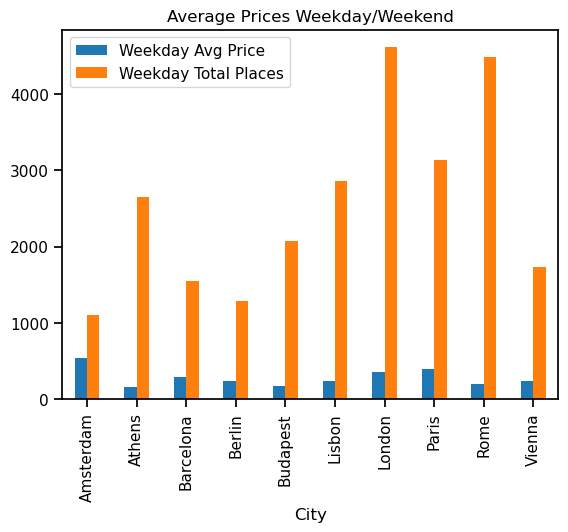

In [449]:
# See if there is correlation between quantity of AirBNB places and the prices.
df_temp.plot(x="City", y=["Weekday Avg Price", "Weekday Total Places"], kind="bar",title="Average Prices Weekday/Weekend")

### Comparing weekday and weekend prices

In [446]:
df_temp =  df.groupby(["Day","City"]) \
       .agg({'realSum':'mean'}) \
       .reset_index() \
       .rename(columns={'realSum': 'Average Price'}).sort_values("Average Price",ascending = False)

df_temp = df_temp.pivot_table(index=['City'], columns='Day',
                   values='Average Price', aggfunc='first').reset_index()
#df_temp.drop(columns =["Day"], inplace=True) 
#df_temp = df_temp.pivot_table(['Average Price'],'City','Day')
df_temp.columns = ['City', 'Weekday','Weekend']
df_temp

City     Weekday     Weekend
0  Amsterdam  545.020526  604.828018
1     Athens  155.866982  147.580456
2  Barcelona  288.391667  300.277940
3     Berlin  240.220422  249.252516
4   Budapest  168.429367  185.120628
5     Lisbon  236.345459  240.044051
6     London  360.230348  364.389747
7      Paris  398.786678  387.028589
8       Rome  201.618053  209.130063
9     Vienna  240.384834  242.739524

<AxesSubplot:title={'center':'Average Prices Weekday/Weekend'}, xlabel='City'>

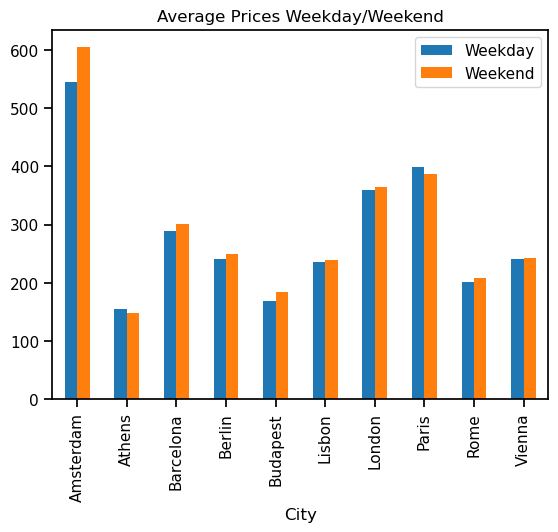

In [440]:
df_temp.plot(x="City", y=["Weekday", "Weekend"], kind="bar",title="Average Prices Weekday/Weekend")

#### Checking out the correlations on heatmap

In [480]:
df.corr().style.background_gradient(cmap='coolwarm')

#### Factors that affect guest satisfaction most
        1-Cleanliness Rating  
        2-Superhosting Status
        3-Person Capacity
        4-Privacy
        

### Seeing the total person capacities in the cities

In [483]:
df_temp =  df.groupby(["person_capacity","City"]) \
       .agg({'realSum':'mean','biz':'count'}) \
       .reset_index() \
       .rename(columns={'realSum': 'Average Price','biz':'Total Count'}).sort_values("Average Price",ascending = False)

df_temp["Tot_capacity"] = df_temp["Total Count"]*df_temp["person_capacity"]
df_temp = df_temp.groupby(["City"]) \
                   .agg({'Average Price':'mean','Tot_capacity':'sum'}) \
                   .reset_index() \
                   .rename(columns={'Tot_capacity':'Total Person Capacity'})
df_temp["Country"] = "Netherlands","Greece","Spain","Germany","Hungary","Portugal","England","France","Italy","Austria"
df_temp.sort_values("Total Person Capacity")
#df_temp.to_csv(r'C:\Users\ierem\Downloads\df_tem.csv',index = False)  


City  Average Price  Total Person Capacity      Country
8       Rome     228.430113                  30307        Italy
6     London     511.212025                  28442      England
7      Paris     512.926616                  19754       France
1     Athens     158.371264                  19526       Greece
5     Lisbon     268.008691                  19268     Portugal
4   Budapest     188.075564                  14241      Hungary
9     Vienna     261.044692                  11850      Austria
2  Barcelona     445.953915                   7413        Spain
3     Berlin     317.896720                   6893      Germany
0  Amsterdam     917.663330                   5786  Netherlands

### Checking out the prices according to the person capacities

In [466]:
df_temp =  df.groupby(["person_capacity","City"]) \
       .agg({'realSum':'mean','biz':'count'}) \
       .reset_index() \
       .rename(columns={'realSum': 'Average Price','biz':'Total Count'}).sort_values("Average Price",ascending = False)

df_temp = df_temp.pivot_table(index=['City'], columns='person_capacity',
                   values=['Average Price','Total Count'], aggfunc='first').reset_index()
#df_temp.drop(columns =["Day"], inplace=True) 
#df_temp = df_temp.pivot_table(['Average Price'],'City','Day')
df_temp.columns = ['Person', '2p AvgPr','3p AvgPr','4p AvgPr','5p AvgPr','6p AvgPr','2p Total','3p Total','4p Total','5p Total','6p Total']
df_temp

Person    2p AvgPr    3p AvgPr    4p AvgPr     5p AvgPr     6p AvgPr  \
0  Amsterdam  417.738213  554.437148  796.215605  1149.416437  1670.509245   
1     Athens  131.160254  126.186083  150.806114   170.145236   213.558632   
2  Barcelona  226.304795  287.089246  459.438164   556.086613   700.850759   
3     Berlin  202.941984  238.409413  297.937007   351.518059   498.677135   
4   Budapest  139.075117  168.023094  185.398701   204.854584   243.026325   
5     Lisbon  173.422544  223.164766  274.376873   316.111335   352.967939   
6     London  252.072299  373.209072  511.294176   609.398570   810.086007   
7      Paris  300.109851  372.335460  474.573850   623.409388   794.204531   
8       Rome  160.587949  178.849443  226.975932   263.860219   311.877020   
9     Vienna  208.475329  203.386859  257.216031   285.123398   351.021845   

   2p Total  3p Total  4p Total  5p Total  6p Total  
0      1247       139       634        21        39  
1      1304       842      1918       576       640  
2      2056       220       309        83       165  
3      1551       339       342       106       146  
4      1185       548      1637       233       419  
5      2341       684      1789       316       633  
6      6207       873      1838       393       682  
7      3686       646      1728       236       392  
8      3431      1374      2618       773       831  
9      1325       500      1187       198       327

### Cleanliness Effect

<AxesSubplot:xlabel='cleanliness_rating'>

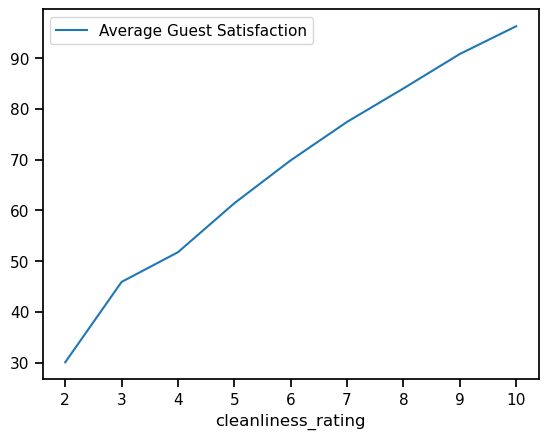

In [486]:
#Most important factor which affects guest satisfaction#
df_temp =  df.groupby(["cleanliness_rating"]) \
       .agg({'guest_satisfaction_overall':'mean', 'City':'count'}) \
       .reset_index() \
       .rename(columns={'guest_satisfaction_overall': 'Average Guest Satisfaction','City':'Count'}) \
       .sort_values("cleanliness_rating",ascending = False)
df_temp
df_temp.plot(x="cleanliness_rating", y="Average Guest Satisfaction", kind="line")

## There is a direct positive correlation between cleanliness rating and guest satisfaction.

 ### Average Prices and quantities of the AirBNB places by room types (Weekday)

In [200]:
df_temp =  df.query("Day == 'weekday'").groupby(["room_type","City"]) \
       .agg({'realSum':'mean','room_shared':'count'}) \
       .reset_index() \
       .rename(columns={'realSum': 'Average Price','room_shared':'count'}).sort_values("Average Price",ascending = False)

df_temp = df_temp.pivot_table(index=['City'], columns=['room_type'],
                    values=['Average Price','count'], aggfunc='first').reset_index()
df_temp.columns = ['City','Avg € Entire home/apt','Avg € Private Room',
                   'Avg € Shared Room','# Entire home/apt','# Private Room','# Shared Room']
df_temp["Country"] = "Netherlands","Greece","Spain","Germany","Hungary","Portugal","England","France","Italy","Austria"
df_temp

City  Avg € Entire home/apt  Avg € Private Room  Avg € Shared Room  \
0  Amsterdam             733.179099          366.764655         280.973918   
1     Athens             159.446251          114.265921          76.535514   
2  Barcelona             572.560054          202.754366         114.797403   
3     Berlin             351.994960          176.219742         143.631726   
4   Budapest             176.303908          102.372106         124.514063   
5     Lisbon             280.079582          147.264072         102.613240   
6     London             551.540156          218.515017         181.432955   
7      Paris             435.591909          301.953303         139.798082   
8       Rome             237.431408          145.091043          89.943255   
9     Vienna             254.550404          191.653288         169.827134   

   # Entire home/apt  # Private Room  # Shared Room      Country  
0                538             559              6  Netherlands  
1               2447             201              5       Greece  
2                362            1185              8        Spain  
3                474             775             35      Germany  
4               1851             216              7      Hungary  
5               1928             894             35     Portugal  
6               1966            2625             23      England  
7               2325             758             47       France  
8               2754            1731              7        Italy  
9               1349             382              7      Austria

 ### Average Prices and quantities of the AirBNB places by room types (Weekend)

In [207]:
df_temp =  df.query("Day == 'weekend'").groupby(["room_type","City"]) \
       .agg({'realSum':'mean','room_shared':'count'}) \
       .reset_index() \
       .rename(columns={'realSum': 'Average Price','room_shared':'count'}).sort_values("Average Price",ascending = False)

df_temp = df_temp.pivot_table(index=['City'], columns=['room_type'],
                    values=['Average Price','count'], aggfunc='first').reset_index()
df_temp.columns = ['City','Avg € Entire home/apt','Avg € Private Room',
                   'Avg € Shared Room','# Entire home/apt','# Private Room','# Shared Room']
df_temp["Country"] = "Netherlands","Greece","Spain","Germany","Hungary","Portugal","England","France","Italy","Austria"
df_temp

City  Avg € Entire home/apt  Avg € Private Room  Avg € Shared Room  \
0  Amsterdam             736.089716          407.722149         280.798163   
1     Athens             150.673221          111.373774          80.339637   
2  Barcelona             745.083436          227.668877         142.609444   
3     Berlin             376.230187          184.940546         161.998199   
4   Budapest             193.380097          116.336681         129.146832   
5     Lisbon             284.884784          150.498915         103.466109   
6     London             539.134735          222.088131         178.447457   
7      Paris             416.218146          296.523550         164.913944   
8       Rome             244.073628          152.500861         106.235242   
9     Vienna             258.494167          189.230345         126.140445   

   # Entire home/apt  # Private Room  # Shared Room      Country  
0                588             385              4  Netherlands  
1               2425             196              6       Greece  
2                180            1094              4        Spain  
3                408             754             38      Germany  
4               1738             203              7      Hungary  
5               1950             917             39     Portugal  
6               2418            2934             27      England  
7               2742             769             47       France  
8               2807            1723              5        Italy  
9               1398             392              9      Austria

### AirBNB place types and their quantities in every city

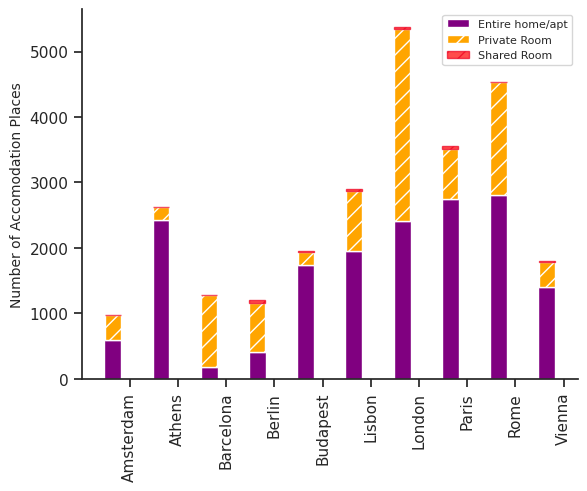

In [249]:
with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("notebook")
    
    bar_width = 0.35
    epsilon = .015
    line_width = 1
    opacity = 0.7
    pos_bar_positions = np.arange(len(df_temp.City))
    neg_bar_positions = pos_bar_positions + bar_width
    
    h = plt.bar(pos_bar_positions, df_temp["# Entire home/apt"], bar_width,
                              color='purple',
                              label='Entire home/apt')
    
    hs = plt.bar(pos_bar_positions, df_temp["# Private Room"], bar_width-epsilon,
                              bottom=df_temp["# Entire home/apt"],
                              #alpha=opacity,
                              color='orange',
                              #edgecolor='blue',
                              #linewidth=line_width,
                              hatch='//',
                              label='Private Room')
    hd = plt.bar(pos_bar_positions, df_temp["# Shared Room"], bar_width-epsilon,
                               bottom=df_temp["# Private Room"]+df_temp["# Entire home/apt"],
                               alpha=opacity,
                               color='red',
                               edgecolor='#ED0020',
                               linewidth=line_width,
                               hatch='//',
                               label='Shared Room')
    plt.xticks(neg_bar_positions, df_temp["City"], rotation=90)
    plt.ylabel('Number of Accomodation Places',fontsize=10)
    plt.legend(loc='best',fontsize=8)
    sns.despine()
    


#### Ratio of quantity of AirBNB places divided by average prices

In [260]:
df_temp2 = df_temp
df_temp2["Entire home/apt ratio"] = df_temp2["# Entire home/apt"]/df_temp["Avg € Entire home/apt"]
df_temp2["Private Room ratio"] = df_temp2["# Private Room"]/df_temp["Avg € Private Room"]
df_temp2["Shared Room ratio"] = df_temp2["# Shared Room"]/df_temp["Avg € Shared Room"]
df_temp2[["City","Entire home/apt ratio","Private Room ratio","Shared Room ratio"]]

City  Entire home/apt ratio  Private Room ratio  Shared Room ratio
0  Amsterdam               0.798816            0.944271           0.014245
1     Athens              16.094433            1.759840           0.074683
2  Barcelona               0.241584            4.805224           0.028049
3     Berlin               1.084442            4.076986           0.234571
4   Budapest               8.987481            1.744935           0.054202
5     Lisbon               6.844872            6.093067           0.376935
6     London               4.484964           13.210972           0.151305
7      Paris               6.587892            2.593386           0.284997
8       Rome              11.500628           11.298297           0.047065
9     Vienna               5.408246            2.071549           0.071349

### Highest rated AirBNB place type in the cities

In [344]:
df_temp2 =  df.query("Day == 'weekday'").groupby(["room_type","City"]) \
       .agg({'realSum':'mean','room_shared':'count',"guest_satisfaction_overall":'mean'}) \
       .reset_index() \
       .rename(columns={'realSum': 'Average Price','room_shared':'count','guest_satisfaction_overall':'rating'})\
       .sort_values(["rating","room_type"],ascending = False)

df_temp2 = df_temp2.drop_duplicates(subset='City', keep="first")
df_temp2
fig = px.bar(df_temp2, x = 'City',   y = 'rating' , color = "room_type",
             title="Highest Rated Accomodations by the Cities")
fig.show()

### Metro Distance – Bedroom Count – Price Graphs in the cities

In [430]:
#df = px.data.iris()
df_ams = df.query("City == 'Amsterdam'",inplace=False)
df_ber = df.query("City == 'Berlin'",inplace=False)
df_bud = df.query("City == 'Budapest'",inplace=False)
df_ath = df.query("City == 'Athens'",inplace=False)
df_rom = df.query("City == 'Rome'",inplace=False)
df_lis = df.query("City == 'Lisbon'",inplace=False)
df_vie = df.query("City == 'Vienna'",inplace=False)
df_par = df.query("City == 'Paris'",inplace=False)
df_bar = df.query("City == 'Barcelona'",inplace=False)
df_lon = df.query("City == 'London'",inplace=False)
fig = px.scatter(df_ams, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="Amsterdam",labels={"metro_dist":"Metro Distance(km)"})
fig2 = px.scatter(df_ber, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="Berlin",labels={"metro_dist":"Metro Distance(km)"})
fig3 = px.scatter(df_bud, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="Budapest",labels={"metro_dist":"Metro Distance(km)"})
fig4 = px.scatter(df_ath, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="Athens",labels={"metro_dist":"Metro Distance(km)"})
fig5 = px.scatter(df_rom, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="Rome",labels={"metro_dist":"Metro Distance(km)"})
fig6 = px.scatter(df_lis, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="Lisbon",labels={"metro_dist":"Metro Distance(km)"})
fig7 = px.scatter(df_vie, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="Vienna",labels={"metro_dist":"Metro Distance(km)"})
fig8 = px.scatter(df_par, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="Paris",labels={"metro_dist":"Metro Distance(km)"})
fig9 = px.scatter(df_bar, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="Barcelona",labels={"metro_dist":"Metro Distance(km)"})
fig10 = px.scatter(df_lon, x="metro_dist", y="bedrooms", color="room_type",
                 size='realSum', hover_data=['bedrooms'],title="London",labels={"metro_dist":"Metro Distance(km)"})
#fig.update_traces(marker=dict(size=12))
#fig.update_layout(height = 600,width = 800)
fig.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

In [419]:
fig6.show()
fig7.show()
fig8.show()
fig9.show()
fig10.show()